# **TEST ĐẦU VÀO KHÓA BUSINESS INTELLIGENCE ANALYST**

## Project Overview

Công phá và trực quan hóa dữ liệu dưới đây bằng 1 trong những tool (hoặc kết hợp nhiều tool) sau: SQL, Power BI, Python, sau đó đưa ra những nhận xét và trình bày những thông tin cơ bản mà bạn tìm thấy

Data: [here](https://drive.google.com/file/d/15ms6-F4QGtM2c4lw9MpuvYpL0cvfULDG/view?usp=sharing)

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("udemy_courses.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [5]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 3678
Number of columns: 12


In [6]:
print("Number of Nulls in each variable")
df.isnull().sum()

Number of Nulls in each variable


course_id              0
course_title           0
url                    0
is_paid                9
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

### What was best year, subject and level of sales?

In [10]:
df["Year"] = df["published_timestamp"].str[0:4]
df["Year"].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: Year, dtype: object

In [17]:
df["Sales"] = df["price"]*df["num_subscribers"]
df["Sales"].head()

0    429400
1    209400
2     97830
3    232845
4    255200
Name: Sales, dtype: int64

In [67]:
sale_year = df.groupby("Year").sum()["Sales"]
sale_year

Year
2011     11643420
2012     11773470
2013     72652195
2014    106939045
2015    314510395
2016    276633190
2017     90769600
Name: Sales, dtype: int64

<AxesSubplot:xlabel='Year'>

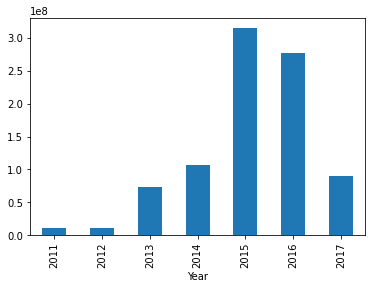

In [71]:
sale_year.plot(kind="bar")

-> 2015 brings the biggest sales, this is probably a favorable year for course sales

In [143]:
sale_level = df.groupby('level').sum()["Sales"].sort_values(ascending = False)
sale_level

level
All Levels            610039770
Beginner Level        219678340
Intermediate Level     49734135
Expert Level            5469070
Name: Sales, dtype: int64

In [142]:
count_level =  df["level"].value_counts()
count_level

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

-> All levels courses have higher sales because this courses have a large number

In [120]:
sale_subject = df.groupby('subject').sum()["Sales"].sort_values(ascending = False)
sale_subject

subject
Web Development        630843775
Business Finance       119264665
Graphic Design          68144835
Musical Instruments     53230545
Graphic  Design          8838335
Business Ffinance        4470650
Musical Instrument        128510
Name: Sales, dtype: int64

-> The web development course has the highest sales and is significantly higher than the rest

In [135]:
count_subject = df["subject"].value_counts()
count_subject

Web Development        1200
Business Finance       1186
Musical Instruments     675
Graphic Design          589
Graphic  Design          14
Business Ffinance         9
Musical Instrument        5
Name: subject, dtype: int64

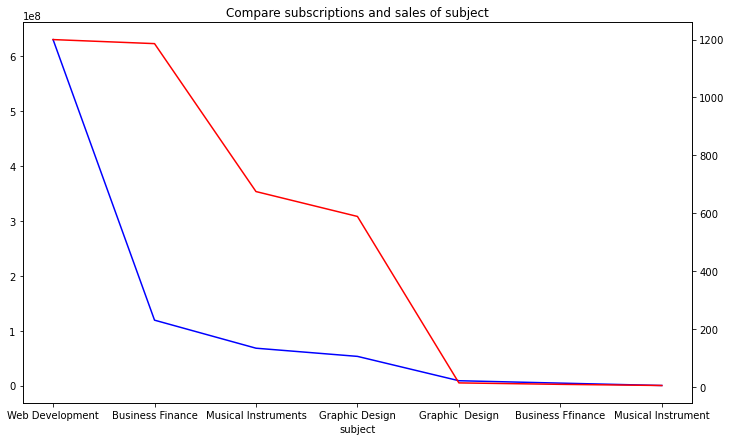

In [144]:
plt.figure(figsize =(12,7))
plt.title("Compare subscriptions and sales of subject")
ax1 = sale_subject.plot(color="blue")
ax2 = count_subject.plot(color="red", ax=ax1.twinx())

-> Intuitively, the number courses of Business Finance is close to Web Development course but the sales from this are significantly lower. Same result with Musical Instruments and Graphic Design courses. The remaining courses are not enough for evaluation

In [78]:
df.groupby(['is_paid']).mean()["num_subscribers"]

is_paid
False    11494.677741
True      2429.808492
Name: num_subscribers, dtype: float64

-> Free courses get more registrations

### Generate Word Clouds From Course Title

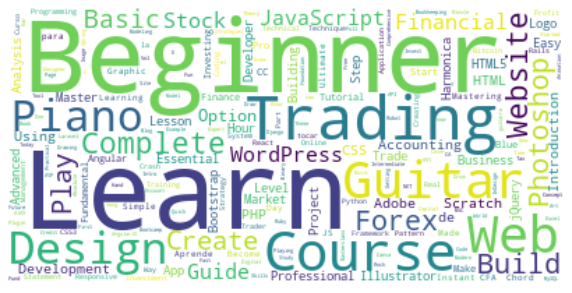

In [91]:
from wordcloud import WordCloud
title = " ".join(course_title for course_title in df.course_title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(title)
plt.figure(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

-> Some of the main keywords of the courses "Learn, Beginner, Trading, Guitar, Piano, Design, JavaScript, Financial, Photoshop, Web, WordPress,..."